<a href="https://colab.research.google.com/github/Avadhi-Singhal/MachineLearning/blob/LinearRegression/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/content/Height_Weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

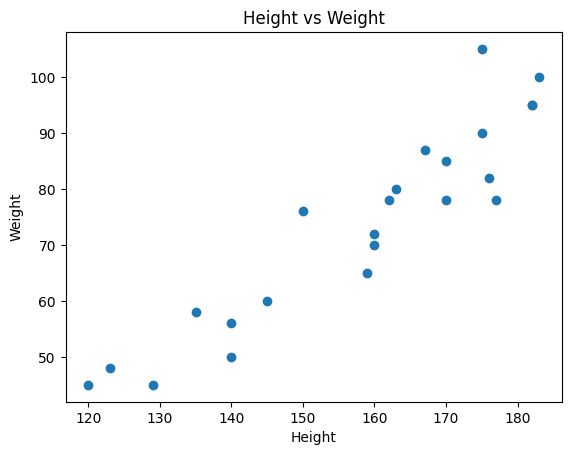

In [4]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [11]:
## Divide features into independent and dependent features
x = df[['Weight']]  # independent feature
y = df['Height']  # dependent feature

In [32]:
## Train Test Split of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [33]:
## Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

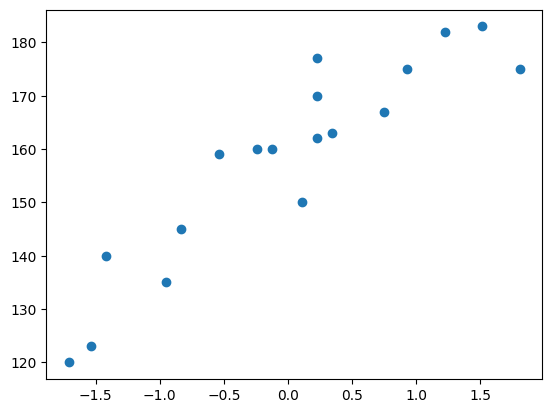

In [34]:
plt.scatter(x_train,y_train)

In [35]:
## Train the Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [36]:
print("The slope or coefficient of weight is:",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is: [16.92653463]
Intercept: 158.11111111111111


Text(0.5, 1.0, 'Height vs Weight')

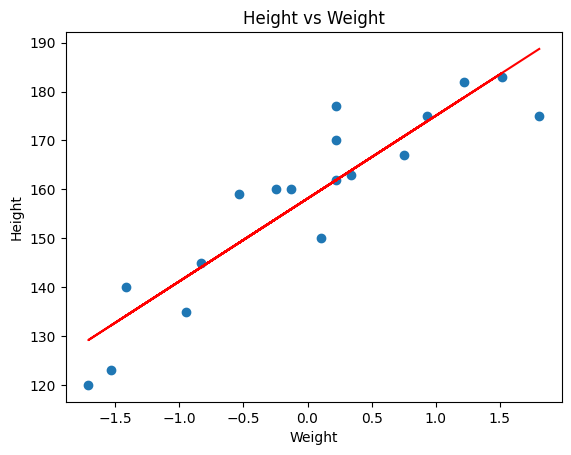

In [37]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')

# prediction of train data
1. predicted height output = intercept+coef_(weight)
2. y_pred_train = 158.1 + 16.92(x_train)

# prediction of test data
1. predicted height output = intercept + coef(weight)
2. y_pred_test = 158.1 + 16.92(x_test)

In [41]:
y_pred_test = regressor.predict(x_test)
y_pred_test

array([178.78596815, 165.88485736, 140.08263577, 168.86203677,
       129.16631126])

Text(0.5, 1.0, 'Height vs Weight')

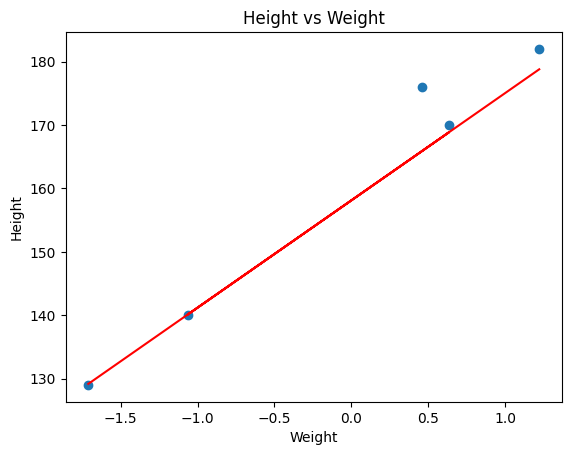

In [42]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),"red")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height vs Weight")

In [43]:
## Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
r2 = r2_score(y_test,y_pred_test)
print(mse,mae,r2)

22.795111961354205 2.943216949404291 0.9481740815720394


In [44]:
## Display adjusted R-squared
1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9308987754293859

In [45]:
## new data point weight = 80
scaled_weight = scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.34200503]])

In [47]:
print("The height prediction for weight 80kg is:",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80kg is: [163.90007108]


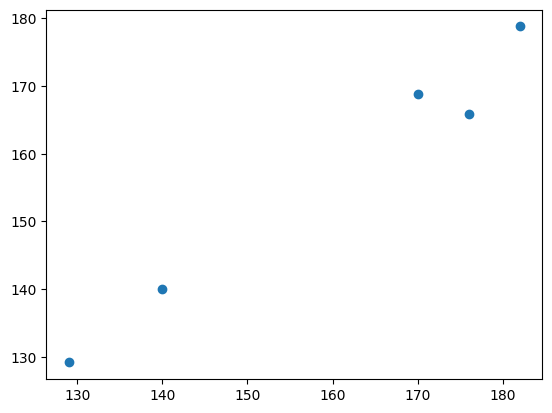

In [48]:
## Assumptions
plt.scatter(y_test,y_pred_test)

In [49]:
residuals = y_test - y_pred_test
residuals

,Height
11,3.214032
10,10.115143
21,-0.082636
14,1.137963
20,-0.166311


<ipython-input-51-df9418d86899>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

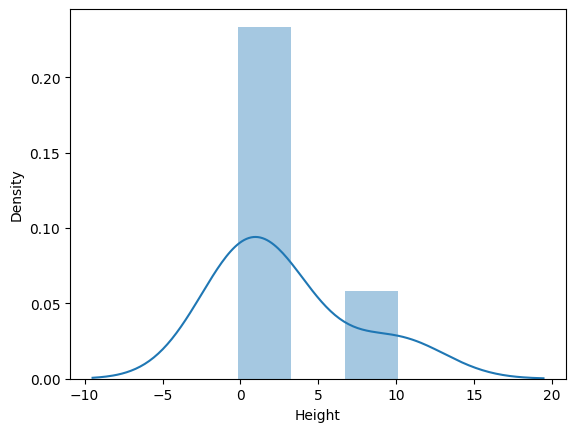

In [51]:
# plot the residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

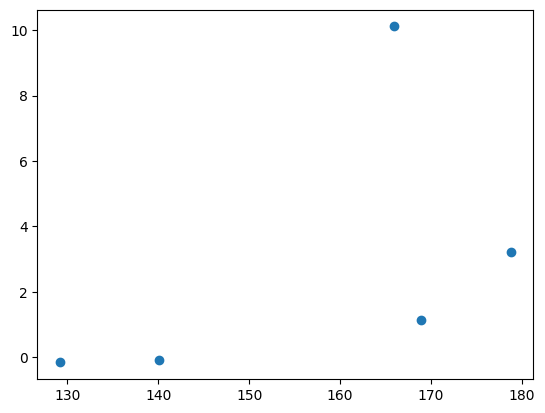

In [52]:
plt.scatter(y_pred_test,residuals)